# An interactive exploration of statistical fluctuations in histograms

By Kyle Cranmer, April 13, 2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import binom, norm

In [3]:
def make_plots(N=100, N_bins=20):
    mu_g, sigma_g = 0., 1.
    x = np.random.normal(mu_g, sigma_g,N)

    mybins = np.linspace(-3,3,N_bins)
    bin_to_study = int(N_bins/2)
    mybins[bin_to_study], mybins[bin_to_study+1]

    bin_width = (mybins[bin_to_study+1]-mybins[bin_to_study])
    middle_of_bin = 0.5*(mybins[bin_to_study]+ mybins[bin_to_study+1])

    # probability to land in the specific bin
    p = norm.cdf(mybins[bin_to_study+1], mu_g, sigma_g) \
        - norm.cdf(mybins[bin_to_study], mu_g, sigma_g)

    # Raw Histogram
    #fig, ax = plt.subplot(3,1,1)
    fig, axs = plt.subplots(3,1,figsize=(10, 10))
    ax = axs[0]
    counts, bins, patches = ax.hist(x,bins=mybins,density=False,label='histogram')
    patches[bin_to_study].set_color('red')
    patches[bin_to_study].set_label('bin to study')
    plt.legend(handles=[patches[bin_to_study]])
    ax.vlines(middle_of_bin,0.,p*N, lw=2,color='black',label='expected count')
    #ax.vlines(middle_of_bin,0.,counts[bin_to_study], lw=2,color='r',label='k observed')
    #ax.hlines(counts[bin_to_study],-3.5,middle_of_bin, lw=2,color='r',label='k observed')
    ax.plot(mybins,N*bin_width*norm.pdf(mybins,mu_g,sigma_g), lw=2, label='True Gaussian')
    ax.set_xlabel('x')
    ax.set_ylabel('counts per bin')
    ax.set_title('Raw histogram')
    ax.legend()

    rv = binom(N,p)

    k_for_plot = np.arange(binom.ppf(0.01, N, p),  binom.ppf(0.99, N, p))

    #ax = plt.subplot(3,1,2)
    ax = axs[1]
    ax.vlines(k_for_plot,0,rv.pmf(k_for_plot), alpha=0.2, color='grey')
    ax.scatter(k_for_plot,rv.pmf(k_for_plot),label='B(k|N,p)')
    ax.hlines(.5*rv.pmf(int(rv.mean())), rv.mean()-.5*rv.std(), rv.mean()+.5*rv.std(), color='black',label='std[k]')
    ax.vlines(rv.mean(),0,rv.pmf(int(rv.mean())), color='black',label='mean(k)')
    ax.vlines(counts[bin_to_study],0,rv.pmf(counts[bin_to_study]), color='r',label='observed k')
    #ax.ylim(0, 1.2*np.max(rv.pmf(k_for_plot)))
    ax.set_xlabel('k, the number of counts in bin of study')
    ax.set_ylabel('p(k)')
    ax.set_ylim([0, 1.2*np.max(rv.pmf(k_for_plot))])    
    ax.set_title('zooming in on relavant part of k')
    ax.legend()

    #ax = plt.subplot(3,1,3)
    ax = axs[2]
    ax.vlines(k_for_plot,0,rv.pmf(k_for_plot), alpha=0.2, color='grey')
    ax.scatter(k_for_plot,rv.pmf(k_for_plot),label='B(k|N,p)')
    ax.hlines(.5*rv.pmf(int(rv.mean())), rv.mean()-.5*rv.std(), rv.mean()+.5*rv.std(), color='black',label='std[k]')
    ax.vlines(rv.mean(),0,rv.pmf(int(rv.mean())), color='black',label='mean(k)')
    ax.vlines(counts[bin_to_study],0,rv.pmf(counts[bin_to_study]), color='r',label='observed k')
    ax.set_xlim(0,N)
    ax.set_xlabel('k, the number of counts in bin of study')
    ax.set_ylabel('p(k)')
    ax.set_ylim([0, 1.2*np.max(rv.pmf(k_for_plot))])
    ax.set_title('The full range of k from [0,N]')
    ax.legend()
    plt.subplots_adjust(hspace=0.5)

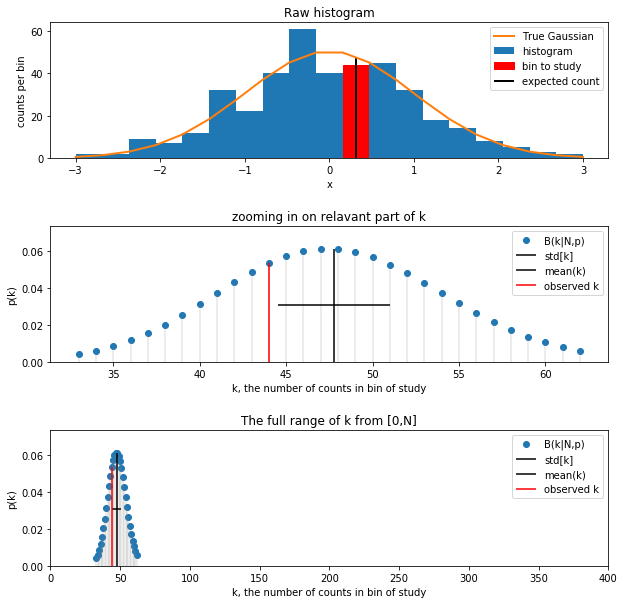

In [4]:
make_plots(400,20)

In [5]:
from ipywidgets import widgets  
from ipywidgets import interact, interactive, fixed

In [6]:
interact(make_plots,N=(10,1000,10), N_bins=(1, 100, 1))

interactive(children=(IntSlider(value=100, description='N', max=1000, min=10, step=10), IntSlider(value=20, de…

<function __main__.make_plots(N=100, N_bins=20)>